In [389]:
## [1-1] 모듈 로딩
import pandas as pd                        # 데이터 분석 및 전처리 모듈
import matplotlib.pyplot as plt            # 시각화 모듈
from matplotlib import rc
import platform                             # 한글 깨짐을 막기 위한 한글 폰트 교체를 위한 모듈
if platform.system() == 'Windows':  # Windows
    rc('font', family='Malgun Gothic')
import numpy as np
from matplotlib.animation import FuncAnimation
import plotly.graph_objects as go
import base64
import matplotlib.animation as animation

In [390]:
## 데이터 준비
D_FILE='./범죄자_범행시_연령_2011-2022.csv'   #연령대별 범죄자 수 파일
datadf=pd.read_csv(D_FILE, encoding="CP949")
efile=pd.read_excel('./성_및_연령별_추계인구_.xlsx')  # 인구 비례 수치를 확인하기 위한 인구 파일
edf=pd.DataFrame(efile)
edf=edf.iloc[20:]

In [391]:
## 데이터 확인
datadf.info()
edf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Columns: 204 entries, 죄종별(1) to 2022.21
dtypes: object(204)
memory usage: 71.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 20 to 25
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   연령별     6 non-null      object
 1   2014    6 non-null      int64 
 2   2015    6 non-null      int64 
 3   2016    6 non-null      int64 
 4   2017    6 non-null      int64 
 5   2018    6 non-null      int64 
 6   2019    6 non-null      int64 
 7   2020    6 non-null      int64 
 8   2021    6 non-null      int64 
 9   2022    6 non-null      int64 
dtypes: int64(9), object(1)
memory usage: 612.0+ bytes


In [392]:
datadf.describe()
edf.describe()

,2014,2015,2016,2017,2018,2019,2020,2021,2022
count,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00
mean,7.901398e+06,7.963207e+06,8.016390e+06,8.071688e+06,8.148726e+06,8.220489e+06,8.278694e+06,8.322650e+06,8.365404e+06
std,1.448432e+06,1.680207e+06,1.923939e+06,2.174418e+06,2.425103e+06,2.712718e+06,3.042415e+06,3.385759e+06,3.662838e+06
min,5.955904e+06,5.710954e+06,5.459511e+06,5.246532e+06,5.087396e+06,4.927537e+06,4.769187e+06,4.643600e+06,4.599712e+06
25%,7.012361e+06,7.026992e+06,7.042980e+06,7.059824e+06,7.107501e+06,7.109679e+06,7.072115e+06,6.962516e+06,6.768752e+06
50%,7.966820e+06,7.968479e+06,7.979076e+06,7.967790e+06,7.959504e+06,7.846856e+06,7.716342e+06,7.573898e+06,7.484978e+06
75%,8.589486e+06,8.607627e+06,8.580152e+06,8.536444e+06,8.494130e+06,8.528832e+06,8.495978e+06,8.444110e+06,8.476884e+06
max,1.002759e+07,1.059749e+07,1.116922e+07,1.176485e+07,1.239011e+07,1.308157e+07,1.385706e+07,1.465160e+07,1.528522e+07


In [393]:
# 결측치 0으로 변경
datadf.replace('-',0,inplace=True)

In [394]:
datadf

,죄종별(1),죄종별(2),2014,2014.1,2014.2,2014.3,2014.4,2014.5,2014.6,2014.7,...,2022.12,2022.13,2022.14,2022.15,2022.16,2022.17,2022.18,2022.19,2022.20,2022.21
0,죄종별(1),죄종별(2),계,미성년,미성년,미성년,미성년,미성년,미성년,미성년,...,성인,성인,성인,성인,성인,성인,성인,성인,성인,미상
1,죄종별(1),죄종별(2),소계,소계,14세미만,14세,15세,16세,17세,18세,...,31~35세,36~40세,41~45세,46~50세,51~55세,56~60세,61~65세,66~70세,71세이상,소계
2,계,소계,1712435,77280,54,9673,14010,16885,17447,19211,...,98488,113250,121865,128633,138387,124037,101537,55832,55396,1943
3,강력범죄,소계,25065,2610,0,330,466,541,601,672,...,2261,2175,2085,2035,2303,1899,1544,911,990,19
4,강력범죄,살인기수,447,18,0,1,6,5,2,4,...,20,24,31,34,38,31,23,16,20,0
5,강력범죄,살인미수등,575,15,0,1,5,2,4,3,...,26,36,36,47,58,62,47,18,29,0
6,강력범죄,강도,2078,405,0,37,87,94,98,89,...,57,73,74,44,41,38,21,11,11,0
7,강력범죄,강간,5517,824,0,80,135,156,228,225,...,635,518,424,314,308,217,162,91,75,4
8,강력범죄,유사강간,389,70,0,11,14,16,19,10,...,93,67,72,66,37,43,30,20,16,1
9,강력범죄,강제추행,13400,883,0,136,157,165,155,270,...,1343,1377,1332,1386,1622,1349,1118,688,785,14


In [395]:
dropcol = []

# 연도별 14세 미만~18세 컬럼명 생성 및 삭제 리스트에 추가
for year in range(2011, 2018): 
    for idx in range(2, 8):  
        dcol = f"{year}.{idx}"
        if dcol in datadf.columns:
            dropcol.append(dcol)

# 14세 미만~18세 컬럼 삭제
datadf = datadf.drop(columns=dropcol)
dropcol = []
for year in range(2018, 2023): 
    for idx in range(2, 7):  
        dcol = f"{year}.{idx}"
        if dcol in datadf.columns:
            dropcol.append(dcol)

datadf = datadf.drop(columns=dropcol)            
       

In [396]:
datadf

,죄종별(1),죄종별(2),2014,2014.1,2014.8,2014.9,2014.10,2014.11,2014.12,2014.13,...,2022.12,2022.13,2022.14,2022.15,2022.16,2022.17,2022.18,2022.19,2022.20,2022.21
0,죄종별(1),죄종별(2),계,미성년,성인,성인,성인,성인,성인,성인,...,성인,성인,성인,성인,성인,성인,성인,성인,성인,미상
1,죄종별(1),죄종별(2),소계,소계,소계,19세,20세,21~25세,26~30세,31~35세,...,31~35세,36~40세,41~45세,46~50세,51~55세,56~60세,61~65세,66~70세,71세이상,소계
2,계,소계,1712435,77280,1633101,20534,15710,113422,149979,180894,...,98488,113250,121865,128633,138387,124037,101537,55832,55396,1943
3,강력범죄,소계,25065,2610,22419,631,464,2627,2471,2601,...,2261,2175,2085,2035,2303,1899,1544,911,990,19
4,강력범죄,살인기수,447,18,429,7,5,31,19,33,...,20,24,31,34,38,31,23,16,20,0
5,강력범죄,살인미수등,575,15,559,2,4,21,29,48,...,26,36,36,47,58,62,47,18,29,0
6,강력범죄,강도,2078,405,1663,70,59,262,246,255,...,57,73,74,44,41,38,21,11,11,0
7,강력범죄,강간,5517,824,4677,214,157,823,681,653,...,635,518,424,314,308,217,162,91,75,4
8,강력범죄,유사강간,389,70,319,12,14,51,38,36,...,93,67,72,66,37,43,30,20,16,1
9,강력범죄,강제추행,13400,883,12509,268,180,1222,1278,1351,...,1343,1377,1332,1386,1622,1349,1118,688,785,14


In [397]:
# 숫자 데이터가 object 타입이므로 int타입으로 변경
datadf.loc[2:, "2014":] = datadf.loc[2:, "2014":].astype(int)

In [398]:
#5세 별로 나누어진 각 항목을 통합후 나이대별로 컬럼명 변경
for year in range(2014, 2018): 
    col1 = f"{year}.9"
    col2 = f"{year}.10"
    col3 = f"{year}.11"
    col4 = f"{year}.12"
    col5 = f"{year}.13"
    col6 = f"{year}.14"
    col7 = f"{year}.15"
    col8 = f"{year}.16"
    col9 = f"{year}.17"
    col10 = f"{year}.18"
    col11 = f"{year}.19"
    col12 = f"{year}.20"
    col13 = f"{year}.21"
    
        
    datadf[col1] = datadf[col1] + datadf[col2] + datadf[col3] + datadf[col4]        
    datadf.drop(columns=[col2, col3, col4],inplace=True)
    datadf.loc[0,col1]='성인'
    datadf.loc[1,col1]='20대'
    
    datadf[col5] = datadf[col5] + datadf[col6] 
    datadf.drop(columns=col6,inplace=True)
    datadf.loc[0,col5]='성인'
    datadf.loc[1,col5]='30대'
    
    datadf[col7] = datadf[col7] + datadf[col8]
    datadf.drop(columns=col8,inplace=True)
    datadf.loc[0,col7]='성인'
    datadf.loc[1,col7]='40대'
    
    datadf[col9] = datadf[col9] + datadf[col10]    
    datadf.drop(columns=col10,inplace=True)
    datadf.loc[0,col9]='성인'
    datadf.loc[1,col9]='50대'

    datadf[col11] = datadf[col11] + datadf[col12] + datadf[col13]        
    datadf.drop(columns=[col12, col13],inplace=True)
    datadf.loc[0,col11]='성인'
    datadf.loc[1,col11]='노인'
    
    
  
   
 
   
   

In [399]:
# 18년부터는 14세 미만 항목이 없으므로 하나씩 수를 적게하여 통합

for year in range(2018, 2023): 
    col1 = f"{year}.8"
    col2 = f"{year}.9"
    col3 = f"{year}.10"
    col4 = f"{year}.11"
    col5 = f"{year}.12"
    col6 = f"{year}.13"
    col7 = f"{year}.14"
    col8 = f"{year}.15"
    col9 = f"{year}.16"
    col10 = f"{year}.17"
    col11 = f"{year}.18"
    col12 = f"{year}.19"
    col13 = f"{year}.20"
    
        
    datadf[col1] = datadf[col1] + datadf[col2] + datadf[col3] + datadf[col4]        
    datadf.drop(columns=[col2, col3, col4],inplace=True)
    datadf.loc[0,col1]='성인'
    datadf.loc[1,col1]='20대'
    
    datadf[col5] = datadf[col5] + datadf[col6] 
    datadf.drop(columns=col6,inplace=True)
    datadf.loc[0,col5]='성인'
    datadf.loc[1,col5]='30대'
    
    datadf[col7] = datadf[col7] + datadf[col8]
    datadf.drop(columns=col8,inplace=True)
    datadf.loc[0,col7]='성인'
    datadf.loc[1,col7]='40대'
    
    datadf[col9] = datadf[col9] + datadf[col10]    
    datadf.drop(columns=col10,inplace=True)
    datadf.loc[0,col9]='성인'
    datadf.loc[1,col9]='50대'

    datadf[col11] = datadf[col11] + datadf[col12] + datadf[col13]        
    datadf.drop(columns=[col12, col13],inplace=True)
    datadf.loc[0,col11]='성인'
    datadf.loc[1,col11]='노인'

In [400]:
# 시각화를 위한 x값 설정
xdata=range(2014,2023)

# 시각화를 위한 y값 설정
#boolean 인덱싱은 행을 찾기 위한 방법이므로 isin으로 각 항목을 필터링하여 dataframe으로 만들고 그것을 다시 any함수로 시리즈로 만들어
# datadf의 컬럼만을 필터링함
ycol = datadf.columns[datadf.isin(['미성년']).any()]
ydata1 = datadf.loc[2, ycol].tolist()  # 시각화를 위한 데이터로 사용하기 위해 tolist 함수를 통해 리스트로 만듬
ydata1
ycol=datadf.columns[datadf.isin(['20대']).any()]
ydata2 = datadf.loc[2, ycol].tolist()
ydata2
ycol=datadf.columns[datadf.isin(['30대']).any()]
ydata3 = datadf.loc[2, ycol].tolist()
ydata3
ycol=datadf.columns[datadf.isin(['40대']).any()]
ydata4 = datadf.loc[2, ycol].tolist()
ydata4
ycol=datadf.columns[datadf.isin(['50대']).any()]
ydata5 = datadf.loc[2, ycol].tolist()
ydata5
ycol=datadf.columns[datadf.isin(['노인']).any()]
ydata6 = datadf.loc[2, ycol].tolist()
ydata6

[150902, 170604, 193277, 196911, 209095, 233443, 236660, 213370, 212765]

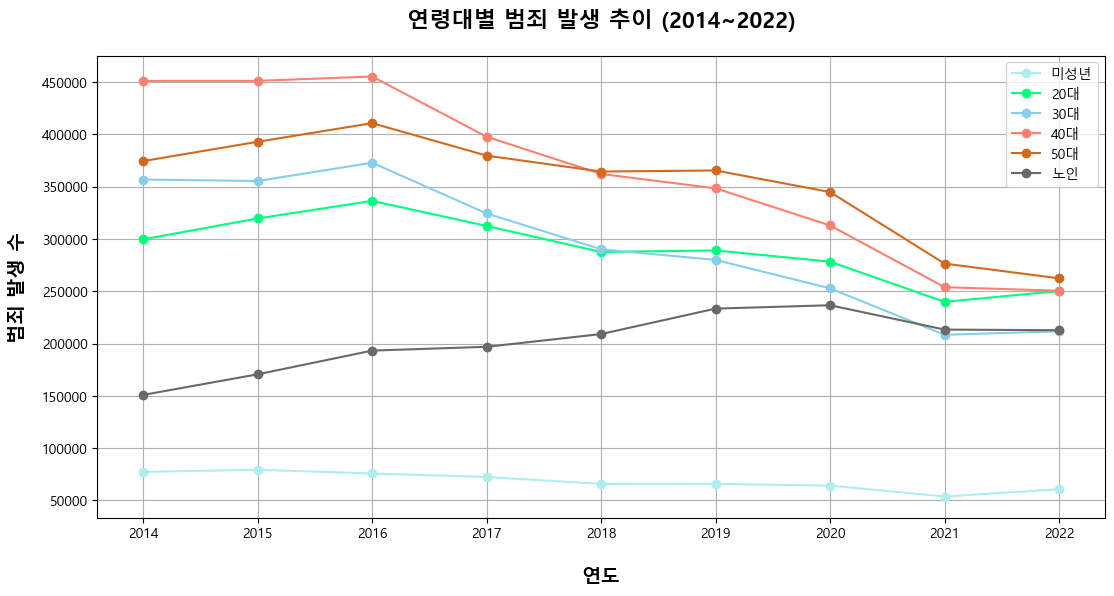

In [401]:
#시각화
plt.figure(figsize=(13,6))
plt.plot(xdata,ydata1,marker='o',label='미성년',color='paleturquoise')
plt.plot(xdata,ydata2,marker='o',label='20대',color='springgreen')
plt.plot(xdata,ydata3,marker='o',label='30대',color='skyblue')
plt.plot(xdata,ydata4,marker='o',label='40대',color='salmon')
plt.plot(xdata,ydata5,marker='o',label='50대',color='chocolate')
plt.plot(xdata,ydata6,marker='o',label='노인',color='dimgray')
plt.xlabel('연도',fontweight='bold',fontsize=14,labelpad=20)
plt.ylabel('범죄 발생 수',fontweight='bold',fontsize=14,labelpad=10)
plt.xticks(xdata)
plt.title('연령대별 범죄 발생 추이 (2014~2022)',fontsize=16, fontweight='bold',pad=20)

plt.legend()
plt.grid()
plt.show()

'./ani.gif'

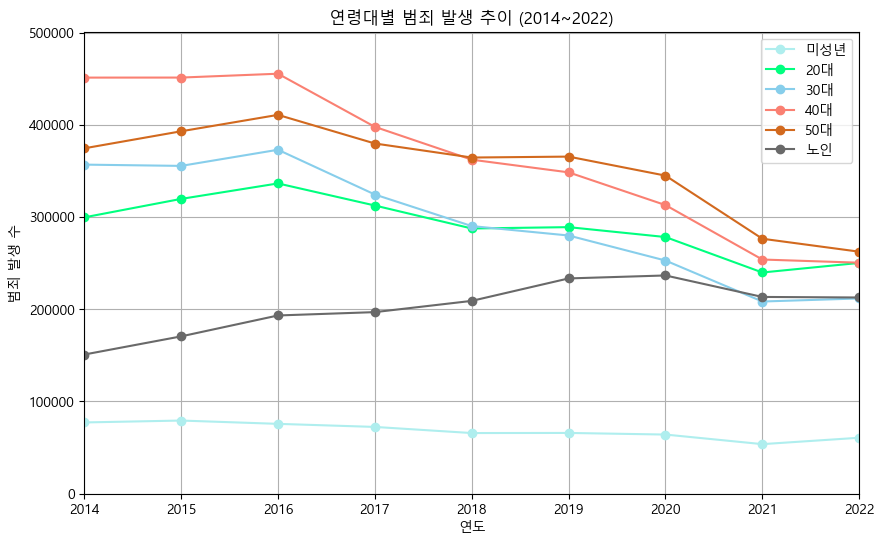

In [402]:
# ydata 변수 활용한 애니메이션 그래프 생성
xdata = list(range(2014, 2023))  # 연도 데이터

# ydata 변수를 정의
ydata_dict = {
    "미성년": ydata1,
    "20대": ydata2,
    "30대": ydata3,
    "40대": ydata4,
    "50대": ydata5,
    "노인": ydata6
}

# 애니메이션 그래프 설정
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_xlim(min(xdata), max(xdata))
ax.set_ylim(0, max(max(values) for values in ydata_dict.values()) * 1.1)
ax.set_title("연령대별 범죄 발생 추이 (2014~2022)")
ax.set_xlabel("연도")
ax.set_ylabel("범죄 발생 수")
ax.grid()
# 초기 라인 설정
colors = ['paleturquoise', 'springgreen', 'skyblue', 'salmon', 'chocolate', 'dimgray']
lines = {age: ax.plot([], [], marker='o', label=age, color=color)[0] for age, color in zip(ydata_dict.keys(), colors)}
ax.legend()

# 애니메이션 프레임 업데이트 함수
def update(frame):
    year_idx = frame + 1  # 연도 인덱스 증가
    for age, line in lines.items():
        line.set_data(xdata[:year_idx], ydata_dict[age][:year_idx])
    return lines.values()

# 애니메이션 실행
ani = animation.FuncAnimation(fig, update, frames=len(xdata), interval=500, blit=True)

ani_path = "./ani.gif"
ani.save(ani_path, writer="pillow")

# 애니메이션 결과 출력
ani_path

In [403]:
# 시각화를 위한 y값 설정
ydata7 = [100*x / y for x, y in zip(ydata1, edf.iloc[0,1:].tolist())]
ydata8 = [100*x / y for x, y in zip(ydata3, edf.iloc[1,1:].tolist())]
ydata9 = [100*x / y for x, y in zip(ydata6, edf.iloc[2,1:].tolist())]
ydata10 = [100*x / y for x, y in zip(ydata6, edf.iloc[3,1:].tolist())]
ydata11 = [100*x / y for x, y in zip(ydata6, edf.iloc[4,1:].tolist())]
ydata12 = [100*x / y for x, y in zip(ydata6, edf.iloc[5,1:].tolist())]

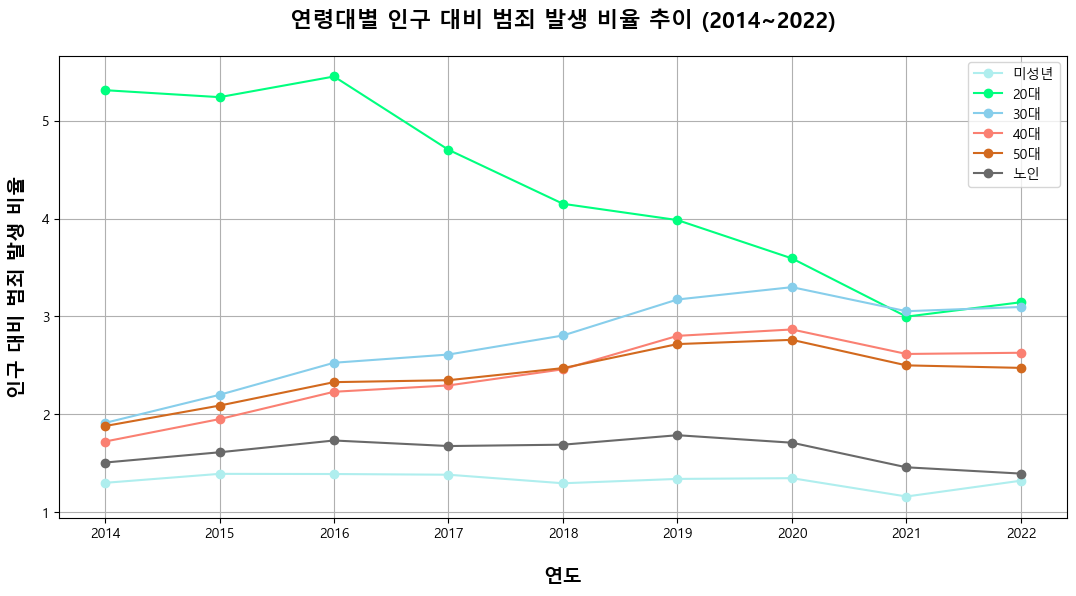

In [404]:
#시각화
plt.figure(figsize=(13,6))
plt.plot(xdata,ydata7,marker='o',label='미성년',color='paleturquoise')
plt.plot(xdata,ydata8,marker='o',label='20대',color='springgreen')
plt.plot(xdata,ydata9,marker='o',label='30대',color='skyblue')
plt.plot(xdata,ydata10,marker='o',label='40대',color='salmon')
plt.plot(xdata,ydata11,marker='o',label='50대',color='chocolate')
plt.plot(xdata,ydata12,marker='o',label='노인',color='dimgray')
plt.xlabel('연도',fontweight='bold',fontsize=14,labelpad=20)
plt.ylabel('인구 대비 범죄 발생 비율',fontweight='bold',fontsize=14,labelpad=10)
plt.xticks(xdata)
plt.title('연령대별 인구 대비 범죄 발생 비율 추이 (2014~2022)',fontsize=16, fontweight='bold',pad=20)

plt.legend()
plt.grid()
plt.show()

'./ani2.gif'

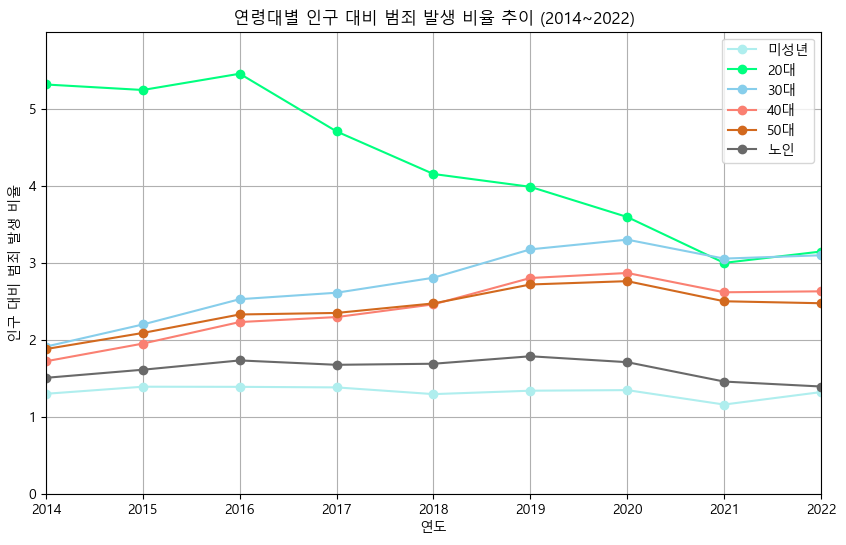

In [405]:
# ydata 변수 활용한 애니메이션 그래프 생성
xdata = list(range(2014, 2023))  # 연도 데이터

# ydata 변수를 정의
ydata_dict2 = {
    "미성년": ydata7,
    "20대": ydata8,
    "30대": ydata9,
    "40대": ydata10,
    "50대": ydata11,
    "노인": ydata12
}

# 애니메이션 그래프 설정
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_xlim(min(xdata), max(xdata))
ax.set_ylim(0, max(max(values) for values in ydata_dict2.values()) * 1.1)
ax.set_title("연령대별 인구 대비 범죄 발생 비율 추이 (2014~2022)")
ax.set_xlabel("연도")
ax.set_ylabel("인구 대비 범죄 발생 비율")
ax.grid()
# 초기 라인 설정
colors = ['paleturquoise', 'springgreen', 'skyblue', 'salmon', 'chocolate', 'dimgray']
lines = {age: ax.plot([], [], marker='o', label=age, color=color)[0] for age, color in zip(ydata_dict2.keys(), colors)}
ax.legend()

# 애니메이션 프레임 업데이트 함수
def update(frame):
    year_idx = frame + 1  # 연도 인덱스 증가
    for age, line in lines.items():
        line.set_data(xdata[:year_idx], ydata_dict2[age][:year_idx])
    return lines.values()

# 애니메이션 실행
ani2 = animation.FuncAnimation(fig, update, frames=len(xdata), interval=500, blit=True)

ani_path2 = "./ani2.gif"
ani2.save(ani_path2, writer="pillow")

# 애니메이션 결과 출력
ani_path2

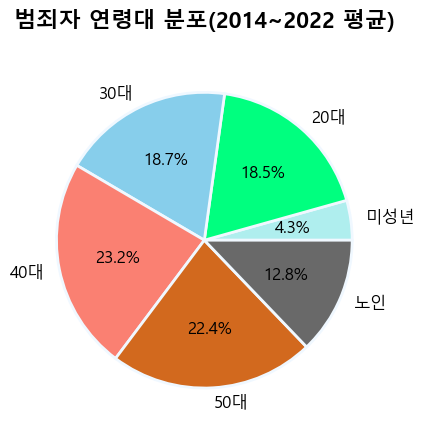

In [406]:
# 시각화를 위한 데이터 설정 및 시각화
ydata_list = [ydata1, ydata2, ydata3, ydata4, ydata5, ydata6]

pielabels = '미성년','20대','30대','40대','50대','노인'
piesize = [sum(ydata) / len(ydata) for ydata in ydata_list]

plt.pie(piesize, labels=pielabels, labeldistance=1.1,autopct='%1.1f%%',
        colors=['paleturquoise','springgreen','skyblue','salmon','chocolate','dimgray'],
        textprops={'fontsize': 12},
        wedgeprops={'linewidth': 2, 'edgecolor': 'aliceblue'})

plt.title('범죄자 연령대 분포(2014~2022 평균)',fontsize=16, fontweight='bold',pad=20)

plt.show()

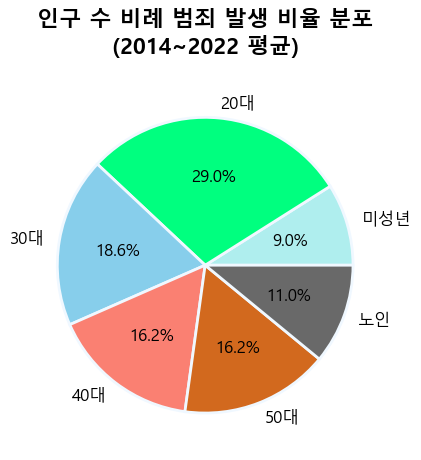

In [407]:
# 시각화를 위한 데이터 설정 및 시각화
ydata_list = [ydata7, ydata8, ydata9, ydata10, ydata11, ydata12]

pielabels = '미성년','20대','30대','40대','50대','노인'
piesize = [sum(ydata) / len(ydata) for ydata in ydata_list]

plt.pie(piesize, labels=pielabels, labeldistance=1.1,autopct='%1.1f%%',
        colors=['paleturquoise','springgreen','skyblue','salmon','chocolate','dimgray'],
        textprops={'fontsize': 12},
        wedgeprops={'linewidth': 2, 'edgecolor': 'aliceblue'})

plt.title('인구 수 비례 범죄 발생 비율 분포\n(2014~2022 평균)',fontsize=16, fontweight='bold',pad=20)

plt.show()